In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [49]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


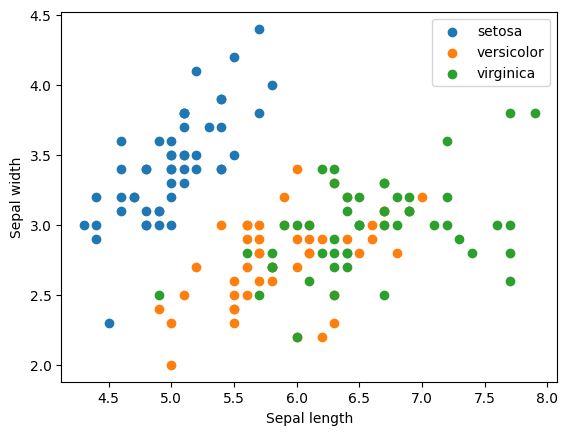

In [50]:
# Create a scatter plot for each class
for i, target_name in enumerate(iris.target_names):
    # Plot data points of the same class
    plt.scatter(
        iris.data[iris.target == i, 0],  # Sepal length
        iris.data[iris.target == i, 1],  # Sepal width
        label=target_name
    )

# Add labels and legend
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

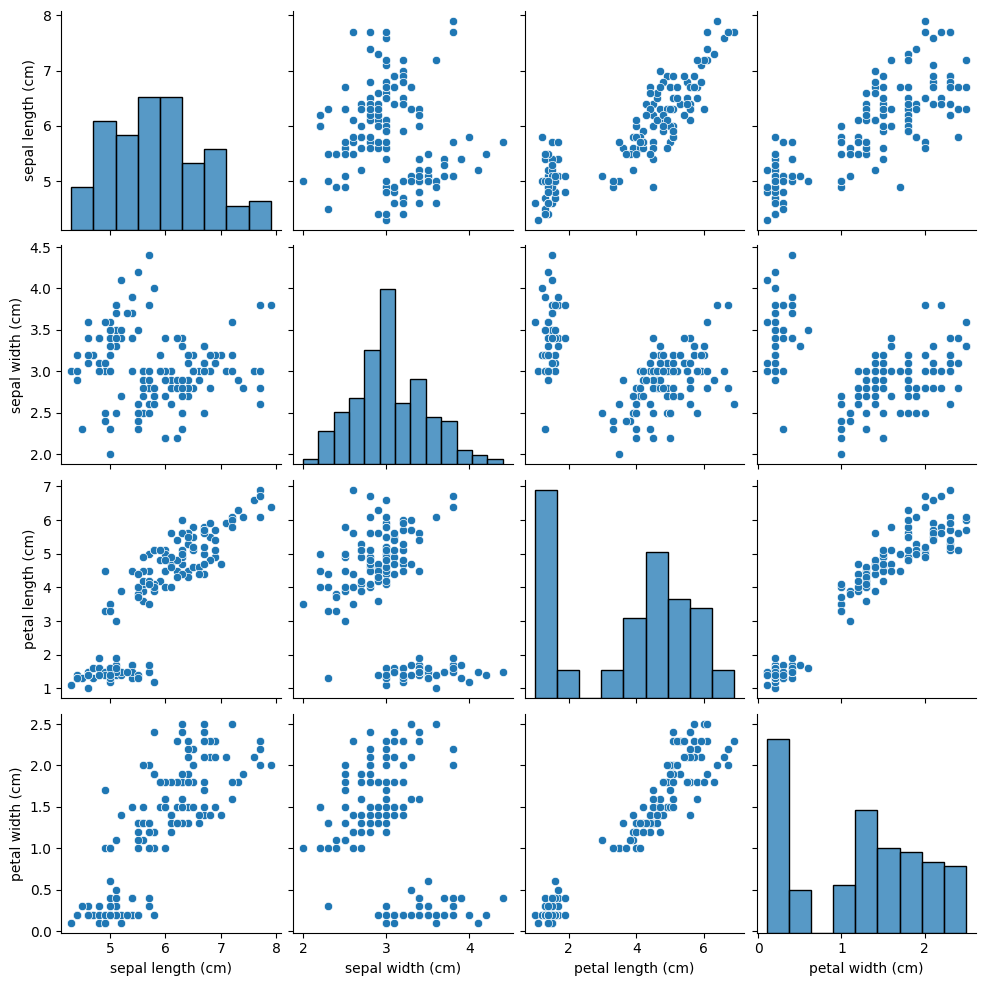

In [51]:
sns.pairplot(iris_df)

# PCA

<AxesSubplot: xlabel='PCA1', ylabel='PCA2'>

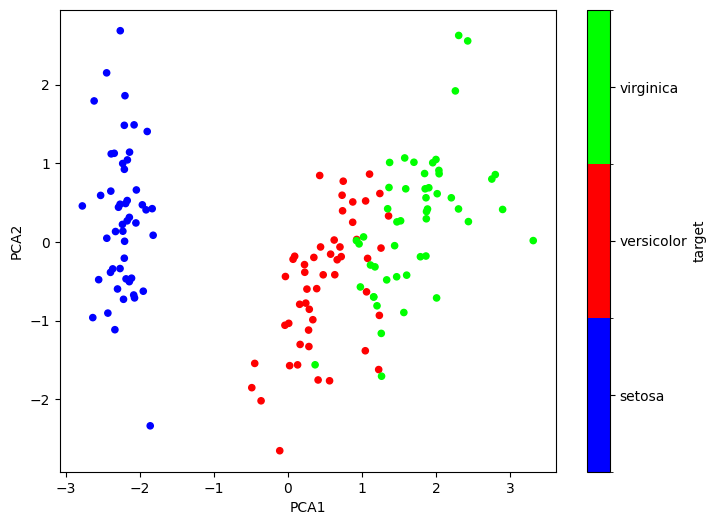

In [70]:
# Standardise variables to get similar variances because PCA is sensitive to variances
df_standardised = StandardScaler().fit(iris_df).transform(iris_df)

# Create PCA model
pca = PCA().fit(df_standardised)

# Transform data into new space
df_pca = pd.DataFrame(pca.transform(df_standardised), columns=['PCA1', 'PCA2', 'PCA3', 'PCA4'])

# Add the target back to the DataFrame for plotting
df_pca['target'] = pd.Categorical.from_codes(iris.target, iris.target_names)

df_pca.plot.scatter(0, 1, c='target', colormap='brg', figsize=(8,6))

# Observations
# setosa is well separated from the other two species
# versicolor and virginica have some overlap, which could suggest only two principal components are not enough to separate them, or that they are similar species

In [53]:
# PCA component loadings
# The range of values for each feature is -1 to 1
pd.DataFrame(pca.components_, columns=iris_df.columns)

# Petal length and petal width are very highly correlated (0.96), so it makes sense that the first principal component is a combination of these two features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.521066,-0.269347,0.580413,0.564857
1,0.377418,0.923296,0.024492,0.066942
2,0.719566,-0.244382,-0.142126,-0.634273
3,-0.261286,0.123510,0.801449,-0.523597


In [54]:
# PCA component explained variance ratio
variance_ratio = pca.explained_variance_ratio_
print(variance_ratio)

[0.72962445 0.22850762 0.03668922 0.00517871]


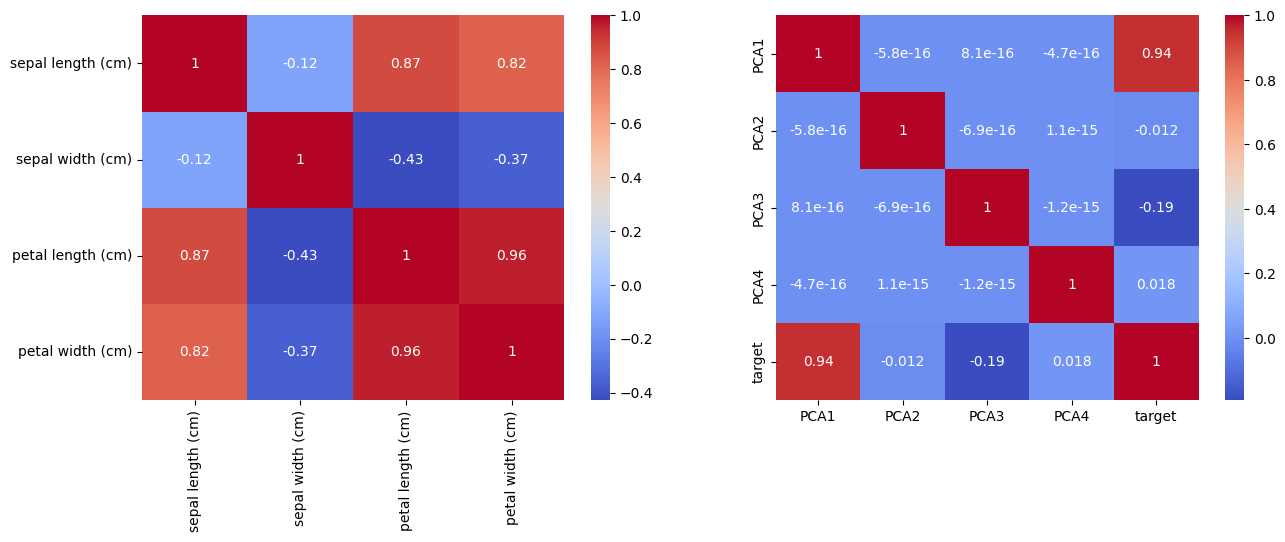

In [55]:
plt.figure(figsize=(15, 5))
# Correlation heatmap 
plt.subplot(1, 2, 1)
sns.heatmap(iris_df.corr(), annot=True, cmap='coolwarm')

# PCA components correlation heatmap
plt.subplot(1, 2, 2)
sns.heatmap(df_pca.corr(), annot=True, cmap='coolwarm')

plt.show()

# Very low correlation between PCA components, which is expected because PCA components are orthogonal to each other 
# PCA components are linear combinations of the original features, so they are not correlated with each other

# PCA2 has lower correlation with the target than PCA3, but PCA2 has higher explained variance ratio than PCA3

# Clustering

<AxesSubplot: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

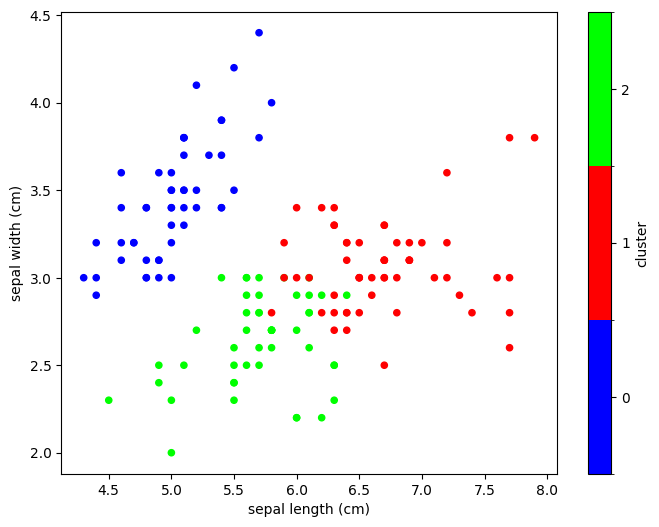

In [65]:
# Create k-means model with three clusters
kmeans = KMeans(n_clusters=3).fit(df_standardised)

# Get memberships of data points in clusters
predictions = kmeans.predict(df_standardised)

# Add memberships back to original data frame
df_cluster = iris_df.copy()
df_cluster['cluster'] = pd.Categorical(predictions)

# Visualise the first two PCA components and colour data points by cluster membership
df_cluster.plot.scatter(0, 1, c='cluster', colormap='brg', figsize=(8,6))

# observation: clusters created by k-means are very similar to seed varieties

In [66]:
pd.crosstab(iris.target, df_cluster['cluster'])

cluster,0,1,2
row_0,,,
0,49,0,1
1,0,13,37
2,0,42,8


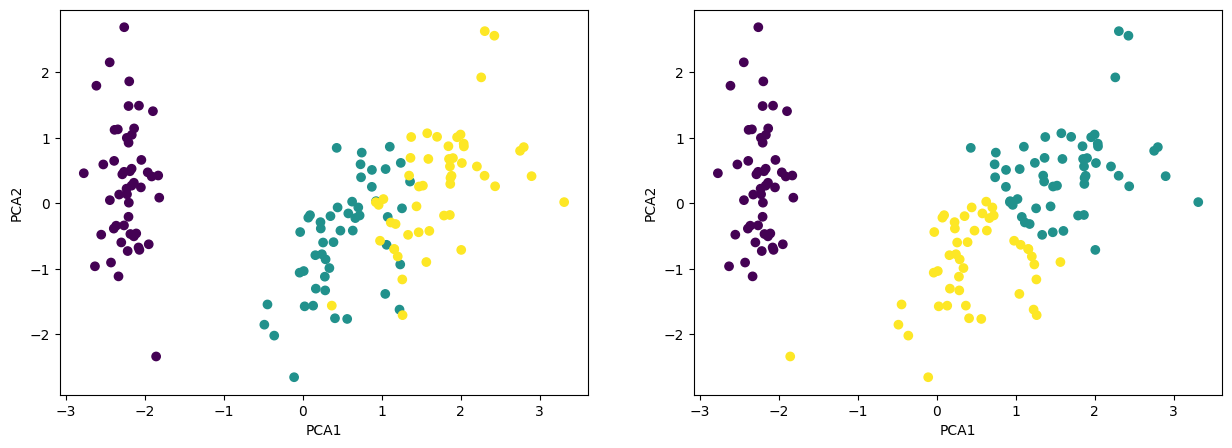

In [75]:
# Side by side plots 
plt.figure(figsize=(15, 5))

# PCA components
plt.subplot(1, 2, 1)
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=iris.target, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

# K-means clusters
plt.subplot(1, 2, 2)
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')

plt.show()